# Data Analysis: Fraud Detection for Automobile Customers Dataset

<a id='overview-0'></a>

## [Overview](./0-AutoClaimFraudDetection.ipynb)
* **[1: Overview, Architecture, and Data Exploration](./0-AutoClaimFraudDetection.ipynb)**
  * **[DataSets and Exploratory Data Analysis](#nb0-data-explore)**
  * **[Exploratory Data Science and Operational ML workflows](#nb0-workflows)**
  * **[The ML Life Cycle: Detailed View](#nb0-ml-lifecycle)**


<a id ='nb0-data-explore'> </a>

## DataSets and Exploratory Visualizations
[Overview](#overview-0)

The dataset is synthetically generated and consists of <font color='green'> customers and claims </font> datasets.
Here we will load them and do some exploratory visualizations.

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install seaborn==0.11.1
!pip install pandas --upgrade

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True)

df_customers = pd.read_csv("./data/customers.csv", index_col=0)
df_customers.head()

,customer_age,months_as_customer,num_claims_past_year,num_insurers_past_5_years,policy_state,policy_deductable,policy_annual_premium,policy_liability,customer_zip,customer_gender,customer_education,auto_year
policy_id,,,,,,,,,,,,
1,54,94,0,1,WA,750,3000,25/50,99207,Unkown,Associate,2006
2,41,165,0,1,CA,750,2950,15/30,95632,Male,Bachelor,2012
3,57,155,0,1,CA,750,3000,15/30,93203,Female,Bachelor,2017
4,39,80,0,1,AZ,750,3000,30/60,85208,Female,Advanced Degree,2020
5,39,60,0,1,CA,750,3000,15/30,91792,Female,High School,2018


## Let’s have a look at data dimensionality, feature names, and feature types.

In [3]:
print(df_customers.shape)

(5000, 12)


In [4]:
features=df_customers.columns
features

Index(['customer_age', 'months_as_customer', 'num_claims_past_year',
       'num_insurers_past_5_years', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'policy_liability', 'customer_zip',
       'customer_gender', 'customer_education', 'auto_year'],
      dtype='object')

### We can use the info() method to output some general information about the dataframe:

In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer_age               5000 non-null   int64 
 1   months_as_customer         5000 non-null   int64 
 2   num_claims_past_year       5000 non-null   int64 
 3   num_insurers_past_5_years  5000 non-null   int64 
 4   policy_state               5000 non-null   object
 5   policy_deductable          5000 non-null   int64 
 6   policy_annual_premium      5000 non-null   int64 
 7   policy_liability           5000 non-null   object
 8   customer_zip               5000 non-null   int64 
 9   customer_gender            5000 non-null   object
 10  customer_education         5000 non-null   object
 11  auto_year                  5000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 507.8+ KB


In [6]:
df_customers.describe()

,customer_age,months_as_customer,num_claims_past_year,num_insurers_past_5_years,policy_deductable,policy_annual_premium,customer_zip,auto_year
count,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,44.038000,98.3446,0.087800,1.414000,751.060000,2925.160000,92707.675600,2015.719600
std,13.465809,71.7000,0.380684,0.888123,13.487505,142.912768,4020.693837,3.393712
min,18.000000,1.0000,0.000000,1.000000,750.000000,2200.000000,83201.000000,2001.000000
25%,33.000000,44.0000,0.000000,1.000000,750.000000,2900.000000,90505.000000,2014.000000
50%,44.000000,85.0000,0.000000,1.000000,750.000000,3000.000000,92804.000000,2016.000000
75%,54.000000,136.0000,0.000000,1.000000,750.000000,3000.000000,95401.500000,2018.000000
max,70.000000,495.0000,6.000000,5.000000,1100.000000,3000.000000,99362.000000,2020.000000


In [8]:
df_customers['num_claims_past_year'].value_counts()

0    4665
1     268
2      43
3      17
4       3
6       2
5       2
Name: num_claims_past_year, dtype: int64

In [9]:
df_customers['customer_education'].value_counts()

Bachelor             2211
High School          1264
Advanced Degree       952
Associate             475
Below High School      98
Name: customer_education, dtype: int64

In [10]:
df_customers['customer_gender'].value_counts()

Male      2281
Female    2208
Unkown     420
Other       91
Name: customer_gender, dtype: int64

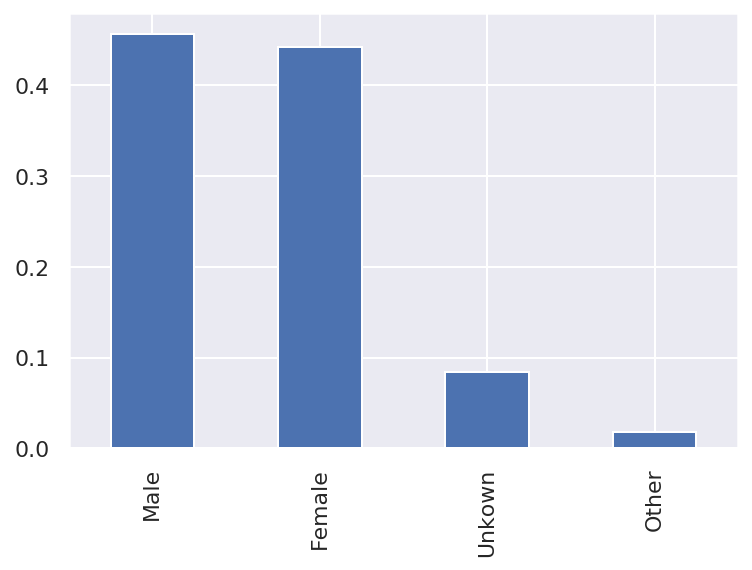

In [11]:
# plot the bar graph customer gender
df_customers['customer_gender'].value_counts(normalize=True).plot.bar()
plt.xticks([0, 1,2,3], ["Male", "Female", "Unkown","Other"]);

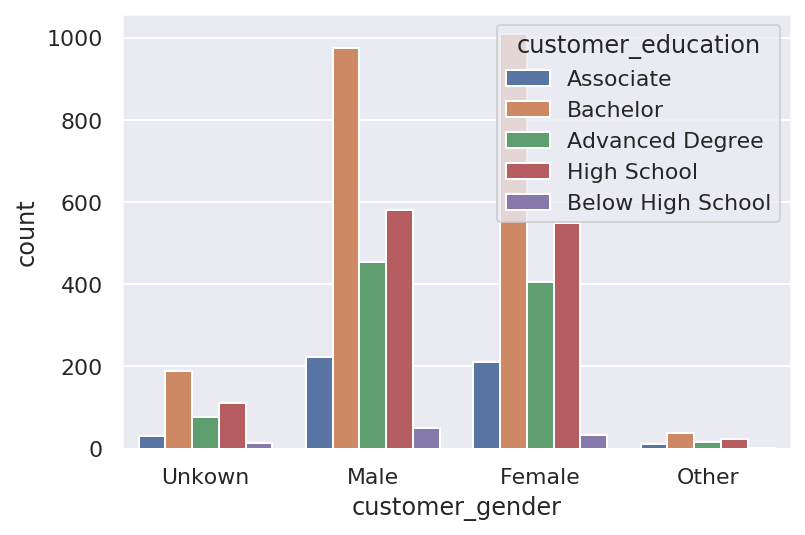

In [12]:
sns.countplot(x="customer_gender", hue="customer_education", data=df_customers);

Text(0.5, 0, 'Number of claims per year')

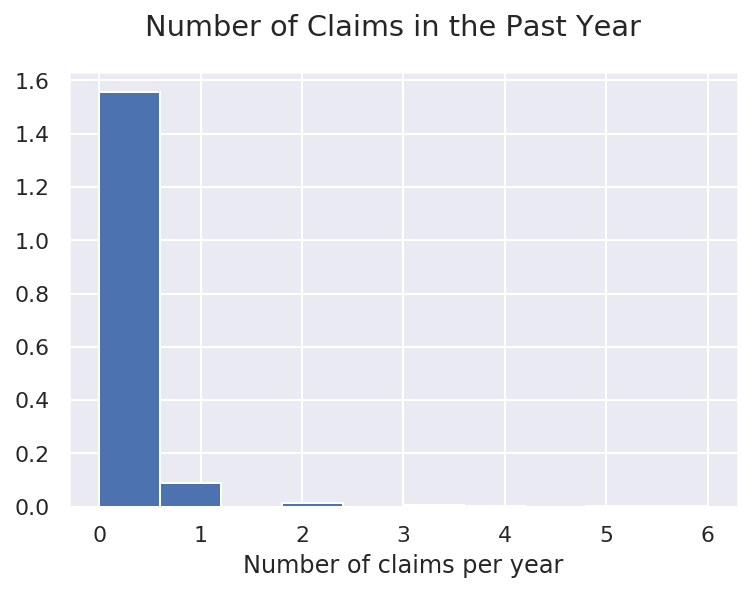

In [13]:
# plot the number of claims filed in the past year
df_customers.num_claims_past_year.hist(density=True)
plt.suptitle("Number of Claims in the Past Year")
plt.xlabel("Number of claims per year")

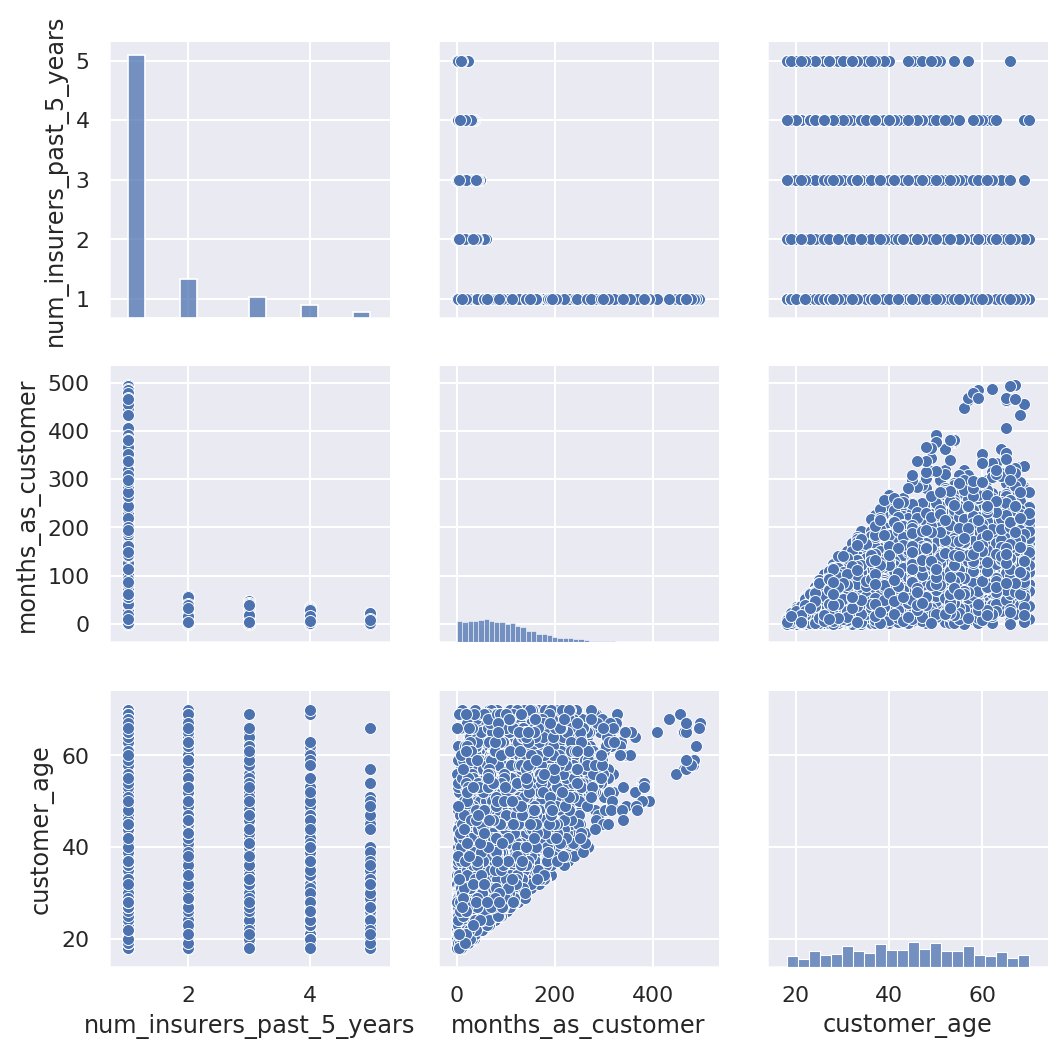

In [14]:
sns.pairplot(
    data=df_customers, vars=["num_insurers_past_5_years", "months_as_customer", "customer_age"]
);

Understandably, the `months_as_customer` and `customer_age` are correlated with each other. A younger person have been driving for a smaller amount of time and therefore have a smaller potential for how long they might have been a customer.

We can also see that the `num_insurers_past_5_years` is negatively correlated with `months_as_customer`. If someone frequently jumped around to different insurers, then they probably spent less time as a customer of this insurer.

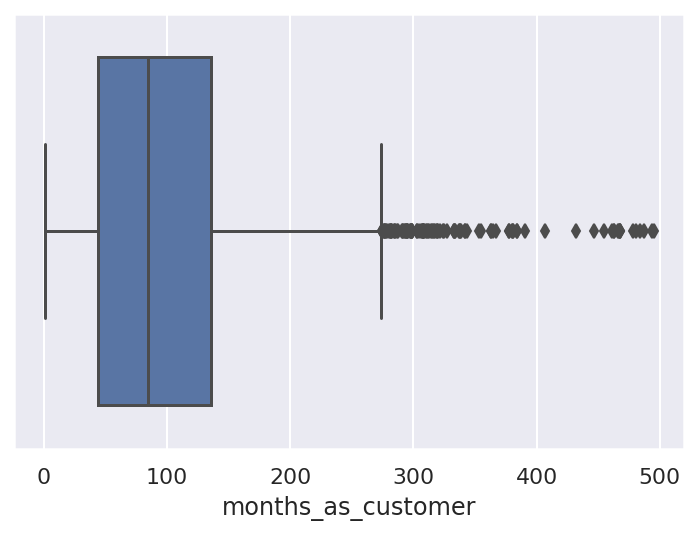

In [15]:
sns.boxplot(x=df_customers["months_as_customer"]);

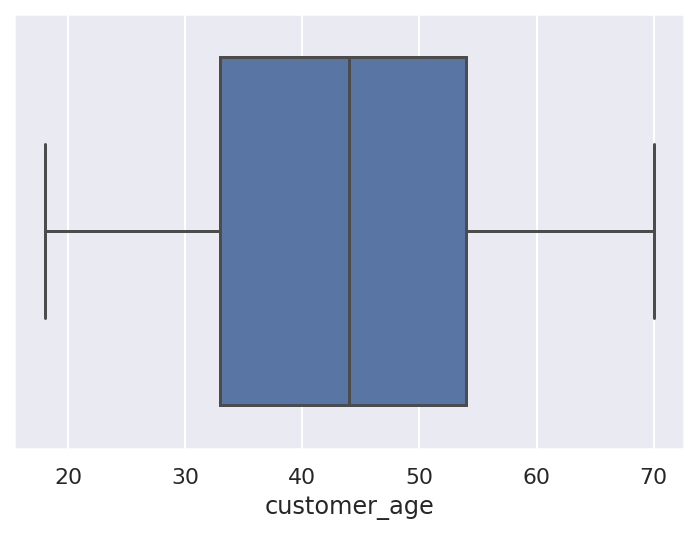

In [16]:
sns.boxplot(x=df_customers["customer_age"]);

___

### Next Notebook: [Data Preparation, Data Wrangler, Feature Store](./03-DataPrep-Wrangler-FeatureStore.ipynb)